# Sentiment Analysis 



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/new_sentimen_dataset_10k.csv")

In [3]:
df.head(5)

,id,timestamp,user,text,ticker,sector,likes,retweets,sentiment_label
0,sent_0,2025-03-03T17:35:08.454820,user_1104,$AAPL strategic acquisition,AAPL,Consumer Staples,3,3,positive
1,sent_1,2025-04-29T22:11:08.456758,user_208,$WMT profit warning,WMT,Technology,4,3,negative
2,sent_2,2025-01-11T09:03:08.456758,user_985,JPMorgan Chase & Co. company updates conferenc...,JPM,Consumer Discretionary,4,2,positive
3,sent_3,2025-03-24T09:21:08.456758,user_848,$META solid quarter on the news,META,Consumer Discretionary,5,4,positive
4,sent_4,2025-01-19T13:01:08.457823,user_206,$NVDA company updates shares jump,NVDA,Consumer Discretionary,6,4,negative


## Pipeline description

We will split data into train/test, vectorize text using TF-IDF (unigrams + bigrams),
then train a Logistic Regression classifier. We'll evaluate with accuracy and a classification report.


In [4]:
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
# basic preprocessing: drop nulls
df = df.dropna(subset=['text','sentiment_label']).reset_index(drop=True)

In [6]:
X = df['text']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# (TF-IDF + Logistic Regression)

In [7]:
pipe = make_pipeline(
    TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english'),
    LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
)

In [8]:
pipe.fit(X_train, y_train)

C:\Users\Chetan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

In [9]:
y_pred = pipe.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.84

Classification report:

              precision    recall  f1-score   support

    negative       0.90      0.83      0.86       591
     neutral       0.72      0.82      0.77       612
    positive       0.91      0.86      0.88       797

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [11]:
# Add this to a new cell
new_text = [
    "$MSFT announces conference call, CEO comments disappointing"
]

print(pipe.predict(new_text))

['neutral']


In [12]:
# Add this to a new cell
import numpy as np

# Get the feature names from the TF-IDF step
feature_names = pipe.named_steps['tfidfvectorizer'].get_feature_names_out()

# Get the coefficients from the Logistic Regression step
# This shows how much "weight" the model gives to each feature
coefficients = pipe.named_steps['logisticregression'].coef_

# Get the class labels
classes = pipe.classes_

# Print the top 10 most important words for each class
for i, class_label in enumerate(classes):
    # Get the top 10 feature indices for this class
    top_10_indices = np.argsort(coefficients[i])[-10:]

    print(f"## Top 10 features for: {class_label}")
    print([feature_names[idx] for idx in top_10_indices])
    print("---")

## Top 10 features for: negative
['regulatory', 'probe', 'weak guidance', 'weak', 'sell', 'sell rating', 'revenue miss', 'miss', 'lawsuit', 'downgrade']
---
## Top 10 features for: neutral
['dividend', 'corporation announces', 'corporation analyst', 'analyst meeting', 'meeting', 'company', 'company updates', 'updates', 'corporation shares', 'conference']
---
## Top 10 features for: positive
['strategic', 'strategic acquisition', 'buy rating', 'upbeat guidance', 'upbeat', 'revenue growth', 'growth', 'strong', 'buy', 'outperform']
---


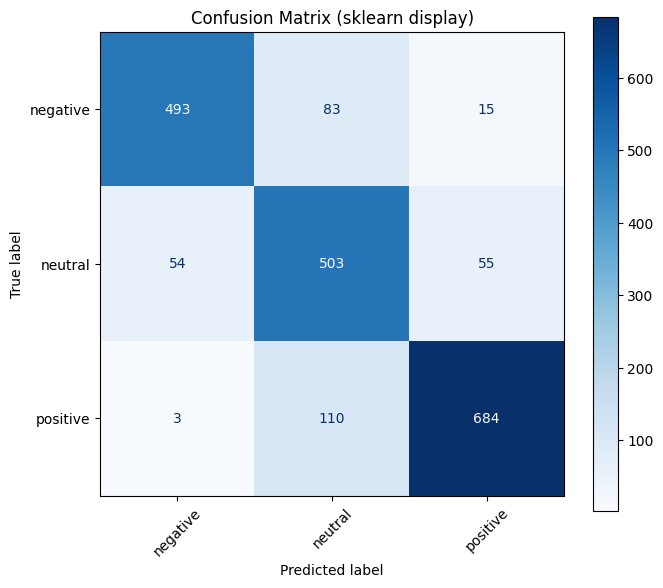

In [13]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test and y_pred must be your true and predicted labels (1D arrays / lists / Series)
# Example:
# y_test = y_test
# y_pred = model.predict(X_test_transformed)

# get label order (preserves all classes present in either array)
labels = np.unique(np.concatenate([np.array(y_test), np.array(y_pred)]))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)



# alternative: sklearn's ConfusionMatrixDisplay (works with sklearn >= 1.0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (sklearn display)')
plt.tight_layout()
plt.show()

# Naive Bayes (MultinomialNB)

In [14]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = make_pipeline(
    TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english'),
    MultinomialNB()
)

In [15]:
pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [16]:
y_pred = pipe_nb.predict(X_test)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.837

Classification report:

              precision    recall  f1-score   support

    negative       0.89      0.83      0.85       591
     neutral       0.72      0.83      0.77       612
    positive       0.91      0.85      0.88       797

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



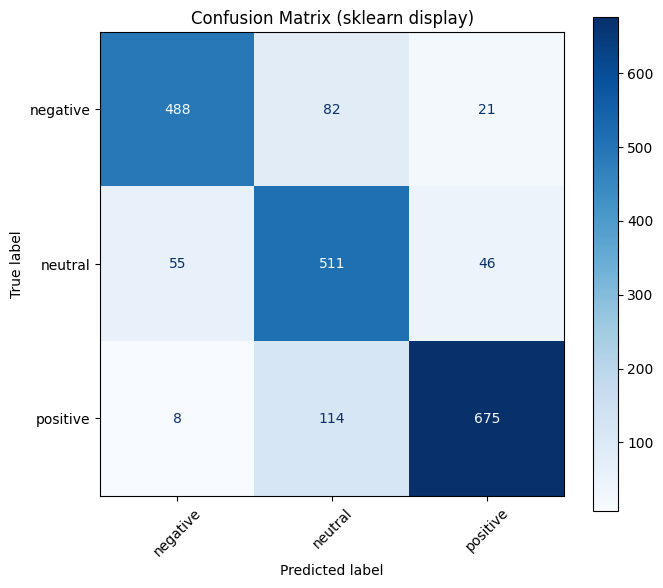

In [18]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test and y_pred must be your true and predicted labels (1D arrays / lists / Series)
# Example:
# y_test = y_test
# y_pred = model.predict(X_test_transformed)

# get label order (preserves all classes present in either array)
labels = np.unique(np.concatenate([np.array(y_test), np.array(y_pred)]))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)



# alternative: sklearn's ConfusionMatrixDisplay (works with sklearn >= 1.0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (sklearn display)')
plt.tight_layout()
plt.show()

# Support Vector Machine

In [19]:
from sklearn.svm import LinearSVC

pipe_svm = make_pipeline(
    TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english'),
    LinearSVC(dual=False) # dual=False is often recommended for n_samples > n_features
)



In [20]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('linearsvc', LinearSVC(dual=False))])

In [21]:
y_pred = pipe_svm.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.853

Classification report:

              precision    recall  f1-score   support

    negative       0.91      0.85      0.88       591
     neutral       0.72      0.86      0.78       612
    positive       0.95      0.85      0.90       797

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.87      0.85      0.86      2000



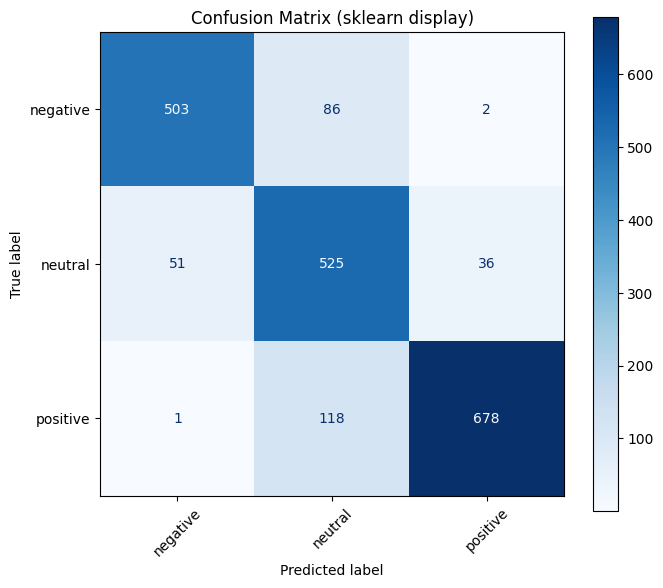

In [23]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test and y_pred must be your true and predicted labels (1D arrays / lists / Series)
# Example:
# y_test = y_test
# y_pred = model.predict(X_test_transformed)

# get label order (preserves all classes present in either array)
labels = np.unique(np.concatenate([np.array(y_test), np.array(y_pred)]))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)



# alternative: sklearn's ConfusionMatrixDisplay (works with sklearn >= 1.0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (sklearn display)')
plt.tight_layout()
plt.show()

# LightGBM

In [24]:
from lightgbm import LGBMClassifier

pipe_lgbm = make_pipeline(
    TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english'),
    LGBMClassifier(n_estimators=200, random_state=42)
)



In [25]:
pipe_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17954
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 337
[LightGBM] [Info] Start training from score -1.219086
[LightGBM] [Info] Start training from score -1.184170
[LightGBM] [Info] Start training from score -0.920048


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('lgbmclassifier',
                 LGBMClassifier(n_estimators=200, random_state=42))])

In [26]:
y_pred = pipe_lgbm.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.797

Classification report:

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82       591
     neutral       0.70      0.73      0.71       612
    positive       0.86      0.84      0.85       797

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



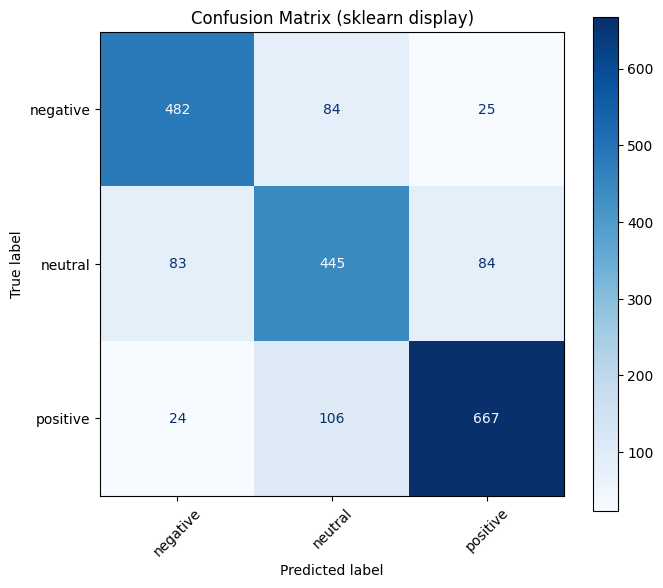

In [28]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test and y_pred must be your true and predicted labels (1D arrays / lists / Series)
# Example:
# y_test = y_test
# y_pred = model.predict(X_test_transformed)

# get label order (preserves all classes present in either array)
labels = np.unique(np.concatenate([np.array(y_test), np.array(y_pred)]))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)



# alternative: sklearn's ConfusionMatrixDisplay (works with sklearn >= 1.0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix (sklearn display)')
plt.tight_layout()
plt.show()